# Simple Deep Learning Model with NumPy, Pandas, and Matplotlib

This notebook demonstrates a simplified deep learning workflow using NumPy for model creation, Pandas for data handling, and Matplotlib for visualizing the model training process. We'll simulate a binary classification task using a single-layer perceptron model.


In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Creating a Simulated Dataset

We'll use Pandas to create and manipulate a simple dataset.


In [2]:
# Simulating a dataset with features and binary labels
np.random.seed(0)  # For reproducibility
features = np.random.randn(100, 2)  # 100 samples, 2 features
labels = np.random.randint(2, size=(100, 1))  # Binary labels (0 or 1)

# Creating a DataFrame
df = pd.DataFrame(features, columns=['Feature 1', 'Feature 2'])
df['Label'] = labels

# Display the first few rows of the DataFrame
print(df.head())


   Feature 1  Feature 2  Label
0   1.764052   0.400157      0
1   0.978738   2.240893      1
2   1.867558  -0.977278      0
3   0.950088  -0.151357      1
4  -0.103219   0.410599      0


## Preparing the Data

We'll split the dataset into training and testing sets.


In [3]:
# Splitting the dataset
train_size = int(0.8 * len(df))  # 80% of the dataset for training
train_set = df[:train_size]
test_set = df[train_size:]

# Separating features and labels
X_train = train_set[['Feature 1', 'Feature 2']].values
y_train = train_set['Label'].values.reshape(-1, 1)

X_test = test_set[['Feature 1', 'Feature 2']].values
y_test = test_set['Label'].values.reshape(-1, 1)


## A Simple Perceptron Model

We'll use NumPy to create a simple perceptron for binary classification.


In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def train_perceptron(X, y, epochs, learning_rate):
    # Weight initialization
    weights = np.zeros((X.shape[1], 1))
    bias = 0
    losses = []
    
    for epoch in range(epochs):
        # Forward pass
        model_output = sigmoid(np.dot(X, weights) + bias)
        
        # Calculating loss (binary cross-entropy)
        loss = -np.mean(y * np.log(model_output) + (1 - y) * np.log(1 - model_output))
        losses.append(loss)
        
        # Backward pass (gradient descent)
        d_weights = np.dot(X.T, (model_output - y)) / X.shape[0]
        d_bias = np.mean(model_output - y)
        
        # Updating weights and bias
        weights -= learning_rate * d_weights
        bias -= learning_rate * d_bias
    
    return weights, bias, losses

# Training the model
epochs = 100
learning_rate = 0.01
weights, bias, losses = train_perceptron(X_train, y_train, epochs, learning_rate)


## Visualizing the Training Process

Let's use Matplotlib to visualize the loss over epochs.


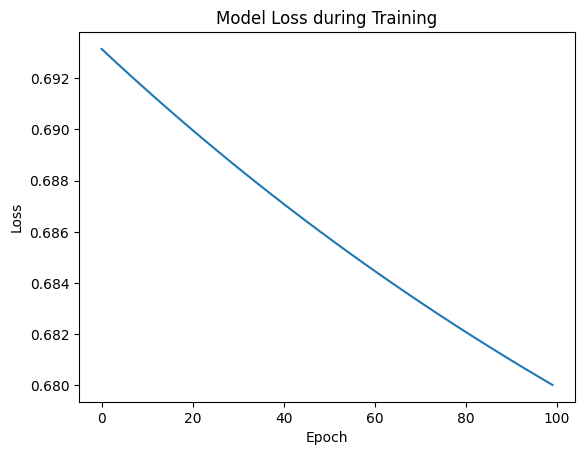

In [5]:
plt.plot(losses)
plt.title('Model Loss during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


This simplified example demonstrates the integration of NumPy, Pandas, and Matplotlib in a deep learning context. We created a dataset, prepared it for training, implemented a basic perceptron model using NumPy, and visualized the training process. Remember, for real-world applications, you would typically use a deep learning framework like TensorFlow or PyTorch for more complex tasks and models.
